<a href="https://colab.research.google.com/github/Cybershark777/FSI-Build-a-Portfolio/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Write your code here to read the data
path = "/content/drive/MyDrive/FoodHub_Data/foodhub_order.csv"

## This method uses pandas read csv format to read the data in ##
pd.read_csv(path)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [9]:
# Write your code here to view the first 5 rows
path = "/content/drive/MyDrive/FoodHub_Data/foodhub_order.csv"

## This first part is creating a dataframe out of the path of the CSV File ##
df = pd.read_csv(path)

## This second part is printing out the first 5 rows of the dataframe ##
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Write your code here
## importing the CSV File as a path ##
path = "/content/drive/MyDrive/FoodHub_Data/foodhub_order.csv"

## Reading the CSV File ##
df = pd.read_csv(path)

## The below commented out section of my code will print out my Dataframe with appropriate title ##
print("Here is my Data Frame...", df)

## The below will show the number of Rows and columns by printing out Rows and Columns, respectively by using the shape function ##
df.shape

Here is my Data Frame...       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  Not given

(1898, 9)

#### Observations:
There are 1,898 rows in the dataset and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# Write your code here

## The info method will tell me each of the data types in the column of the dataframe ##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The different data types of the columns in the dataset are 1 type of float, 4 types are of integer and the other 4 are of objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Write your code here

## The block of code below is to identify if there are any null values within the data itself
null = pd.isnull(df)
null.head()

#The second block of code is to run the sum of the total number of missing values within the dataset. First sum is by the columns and the second sums the entire thing. Doing it twice is the Sum of the entire dataframe#
pd.isnull(df).sum().sum()

## Detect a list of missing values with df.isin() ##

## This is another method to search for missing values within a dataframe ##

missing_values = ["NA", "", None, np.NaN]
missing = df.isin(missing_values)
missing.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


#### Observations:
Currently, within the dataset there are no null values so there is nothing to be treated. The method used for this was the pandas.isnull which will return true for all null values found. Several types of checks were performed

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Write your code here

## Column Value that is being assessed : Food_Preparation_Time ##

## The below blocks of Code are to find the Minimum amount of time it takes for food to be prepared ##
min_time = df['food_preparation_time'].loc[df['food_preparation_time'].idxmin()]
print(min_time)

## The below blocks of Code are to find the Maximum amount of time it takes for food to be prepared ##
max_time = df['food_preparation_time'].loc[df['food_preparation_time'].idxmax()]
print(max_time)

## The block of code below is to find the average amount of time it takes for food to be prepared ##
df.food_preparation_time.mean()
print(df.food_preparation_time.mean())

20
35
27.371970495258168


#### Observations:
The above code blocks are meant to indicate a couple of things. The first block of code is to find the minimum amount of time it takes for food to be prepared. The second block of code is to find the maximum amount of time it tajes for food to be prepared. The final block of code is to find the average amount of time it takes for food to be prepared.

### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
# Write the code here

## Rating is the Field being assessed for this block of code. The specific value for a Rating that was not assessed is 'NOT GIVEN' ##
Condition = df['rating'] == 'Not given'
df[Condition]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:
There are 736 rows that return the rating of 'Not Given' for the Rating column.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


Summary statistics for numerical variables:
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  

Summary statistics for cat

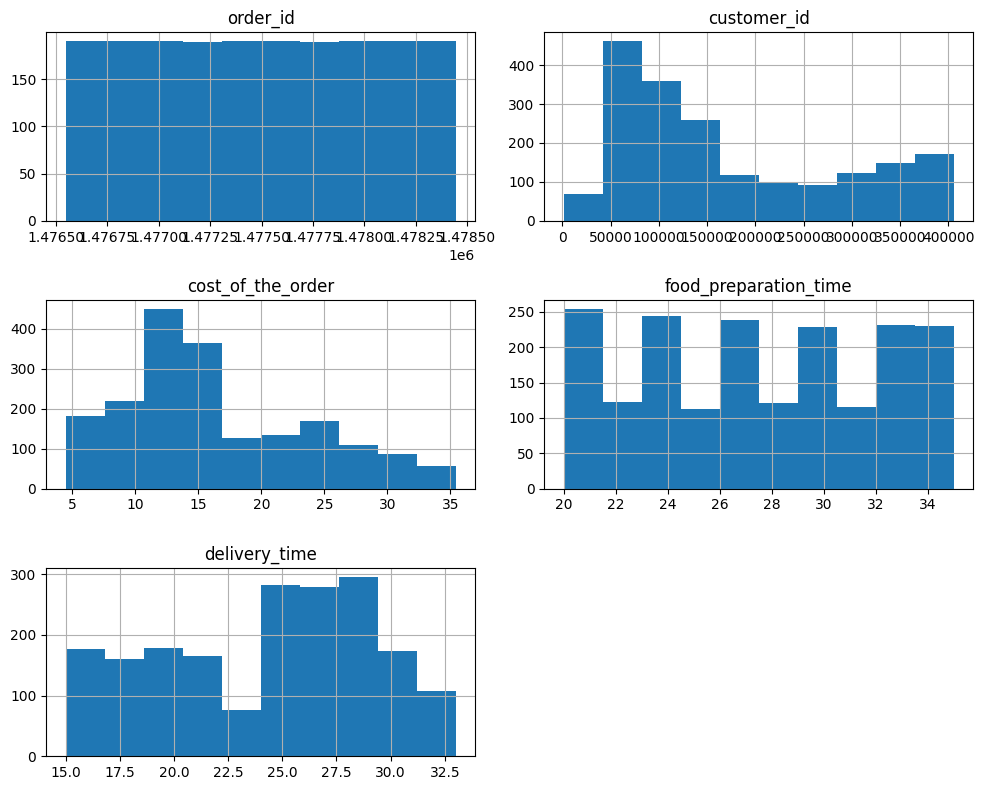


Box plots for numerical variables:


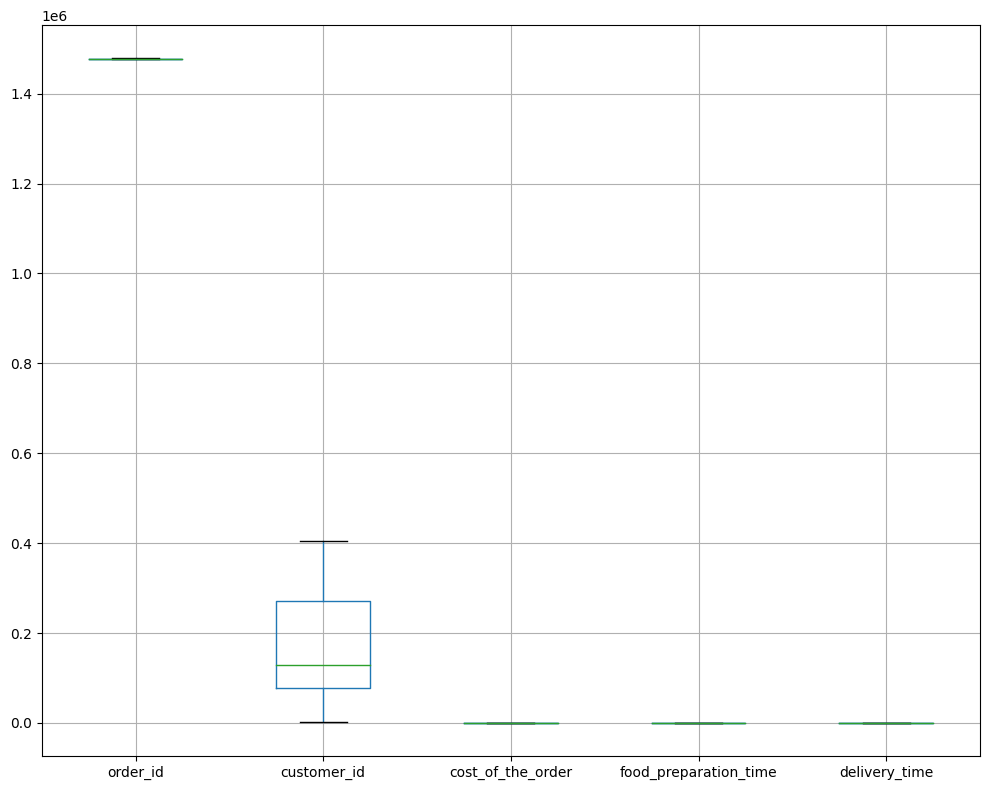

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


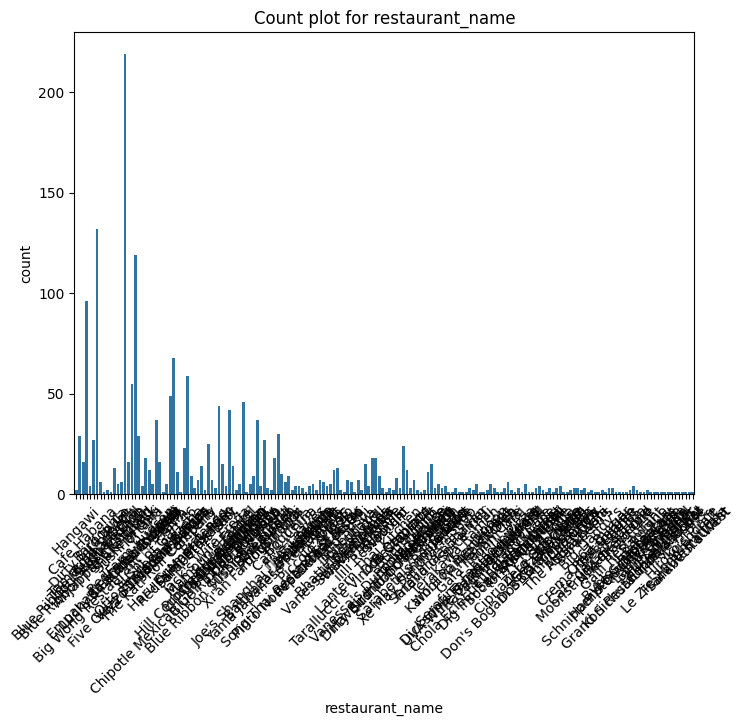

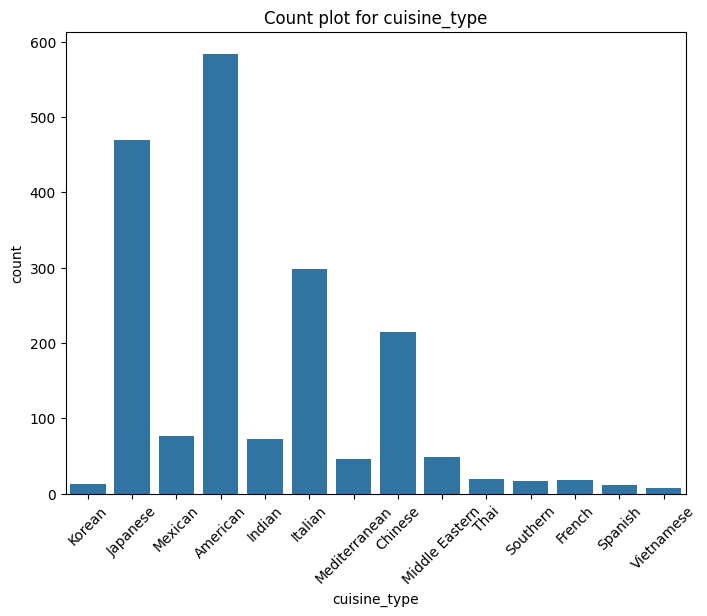

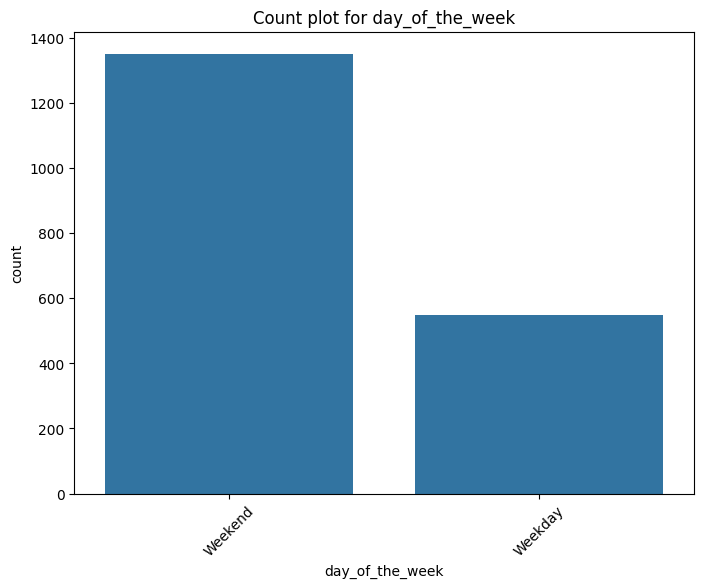

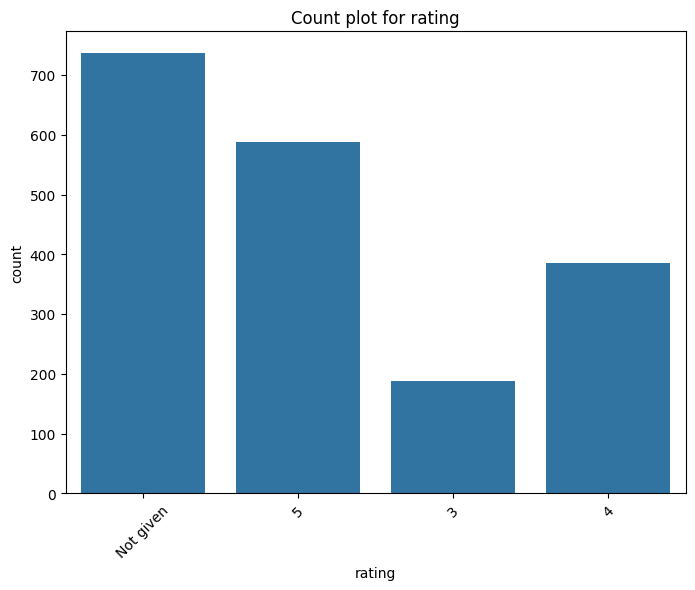

In [43]:
# Write the code here

# Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(df.describe())

# Summary statistics for categorical variables
print("\nSummary statistics for categorical variables:")
print(df.describe(include=['O']))


# Histograms for numerical variables
print("\nHistograms for numerical variables:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical variables
print("\nBox plots for numerical variables:")
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Count plot for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count plot for {col}')
    plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here

# Group by restaurant and count the number of orders for each
restaurant_orders = df.groupby('restaurant_name')['order_id'].count().reset_index()

# Sort the restaurants by the number of orders in descending order
restaurant_orders_sorted = restaurant_orders.sort_values(by='order_id', ascending=False)

# Get the top 5 restaurants
top_5 = restaurant_orders_sorted.head(5)

# Print the top 5 restaurants
print("Top 5 restaurants in terms of the number of orders received:")
print(top_5)


Top 5 restaurants in terms of the number of orders received:
               restaurant_name  order_id
136                Shake Shack       219
153          The Meatball Shop       132
21           Blue Ribbon Sushi       119
20   Blue Ribbon Fried Chicken        96
109                       Parm        68


#### Observations:
The block of code above first creates a grouping of the number of orders and it counts them. Second, the code sorts the restaurants by the number of orders in descending order so that they are organized. Finally, it takes the remaining group of orders and I create a variable known as the top-5 which sorts the rest. orders by pulling the head (5) of those. I then return those restauraunts. The top five restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here

def most_popular_cuisine_on_weekends(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Filter the dataframe for weekend orders
    weekend_orders = df[df['day_of_the_week'] == 'Weekend']

    # Find the most popular cuisine on weekends
    most_popular_cuisine = weekend_orders['cuisine_type'].mode()[0]

    return most_popular_cuisine

# File path to the CSV file
#file_path = 'path_to_your_csv_file.csv'

# Calculate and print the most popular cuisine on weekends
most_popular_cuisine = most_popular_cuisine_on_weekends(path)
print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")




The most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is American as indicated above.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Write the code here

def calculate_percentage_above_20(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Calculate total number of orders
    total_orders = len(df)

    # Calculate number of orders costing more than 20 dollars
    orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

    # Calculate the percentage
    percentage_above_20 = (orders_above_20 / total_orders) * 100

    return percentage_above_20

# Calculate and print the percentage
percentage = calculate_percentage_above_20(path)
print(f"Percentage of orders costing more than 20 dollars: {percentage:.2f}%")


Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:
The percentage of orders that are more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here

# The column name that I am looking for is the Order Delivery Time #
df['delivery_time'].mean()
print(df['delivery_time'].mean())

24.161749209694417


#### Observations:
The mean Order Delivery Time is 24.1617 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Write the code here

def top_frequent_customers(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Count the number of orders per customer
    customer_order_counts = df['customer_id'].value_counts()

    # Get the top 3 most frequent customers
    top_customers = customer_order_counts.head(3)

    return top_customers

# Find and print the IDs of the top 3 most frequent customers and the number of orders they placed
top_customers = top_frequent_customers(path)
print("Top 3 most frequent customers and the number of orders they placed:")
print(top_customers)



Top 3 most frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The top frequent customers are customer id's : 52832, 47440, and 83287. The number of orders they placed are 13, 10 ad 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


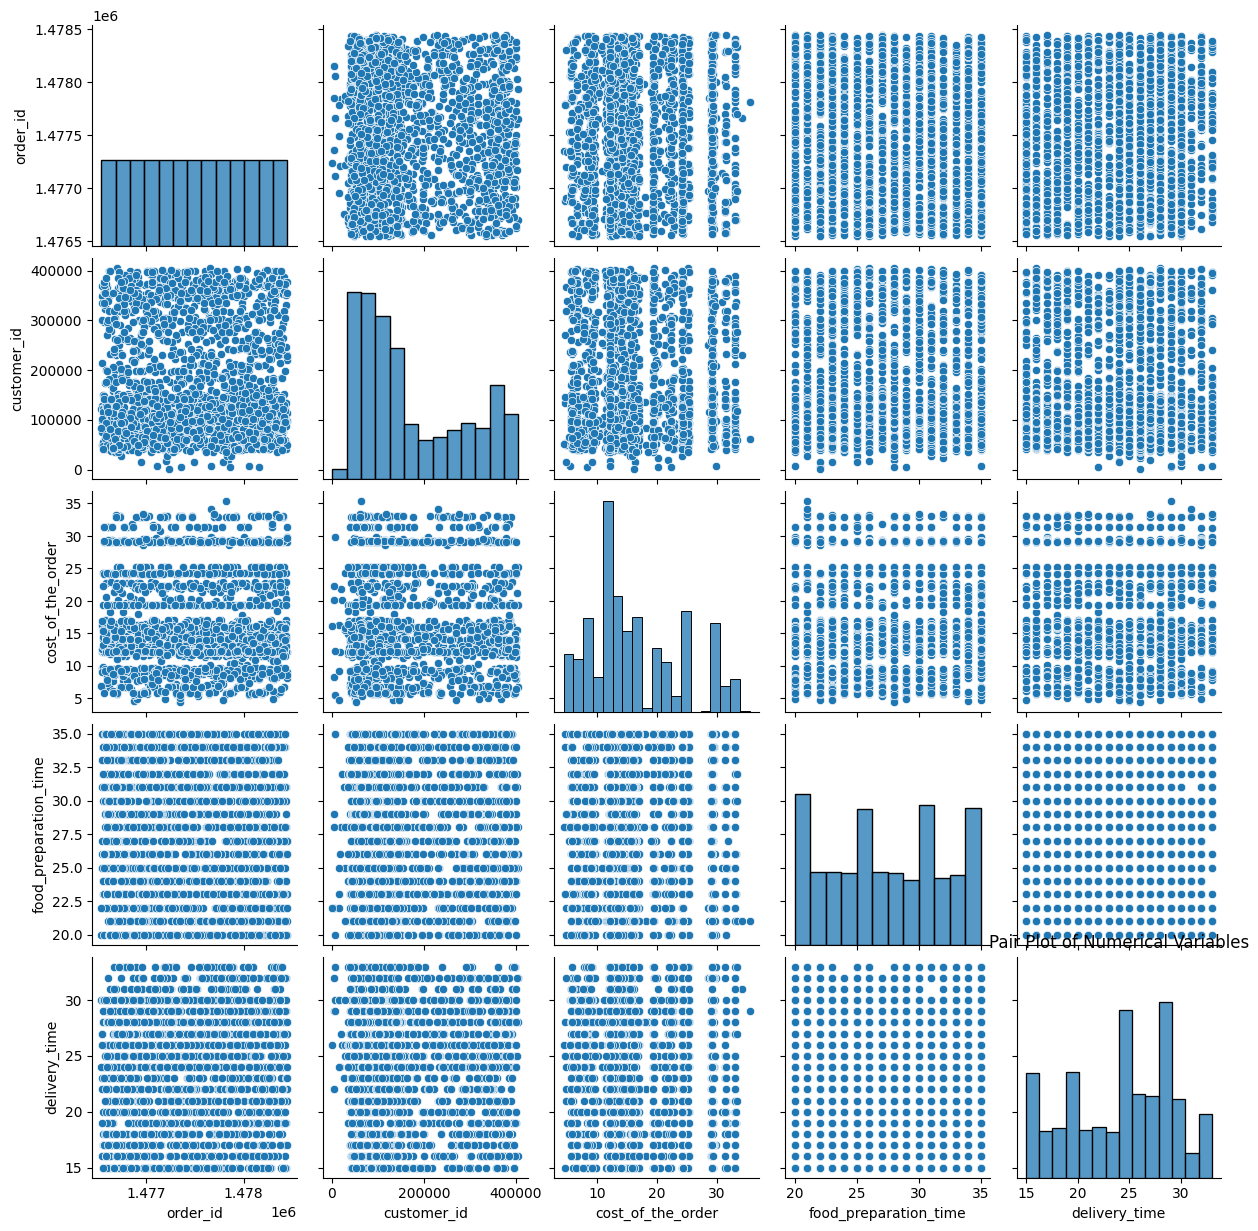

Average cost of the order by cuisine type:
cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


<ipython-input-37-b4c1e19b675d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_cuisine.index, y=avg_cost_by_cuisine.values, palette='viridis')


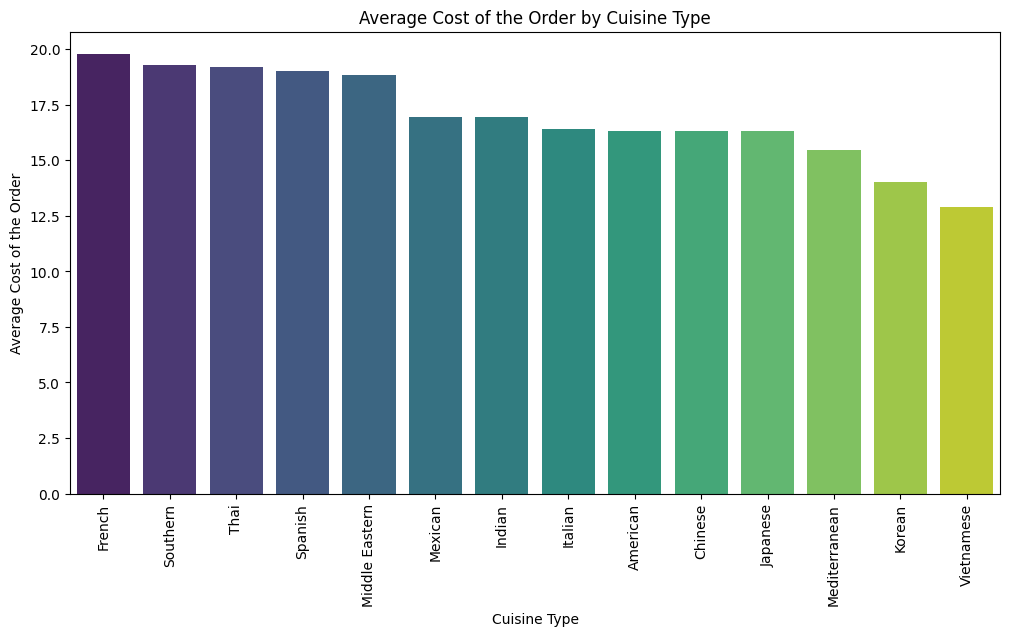

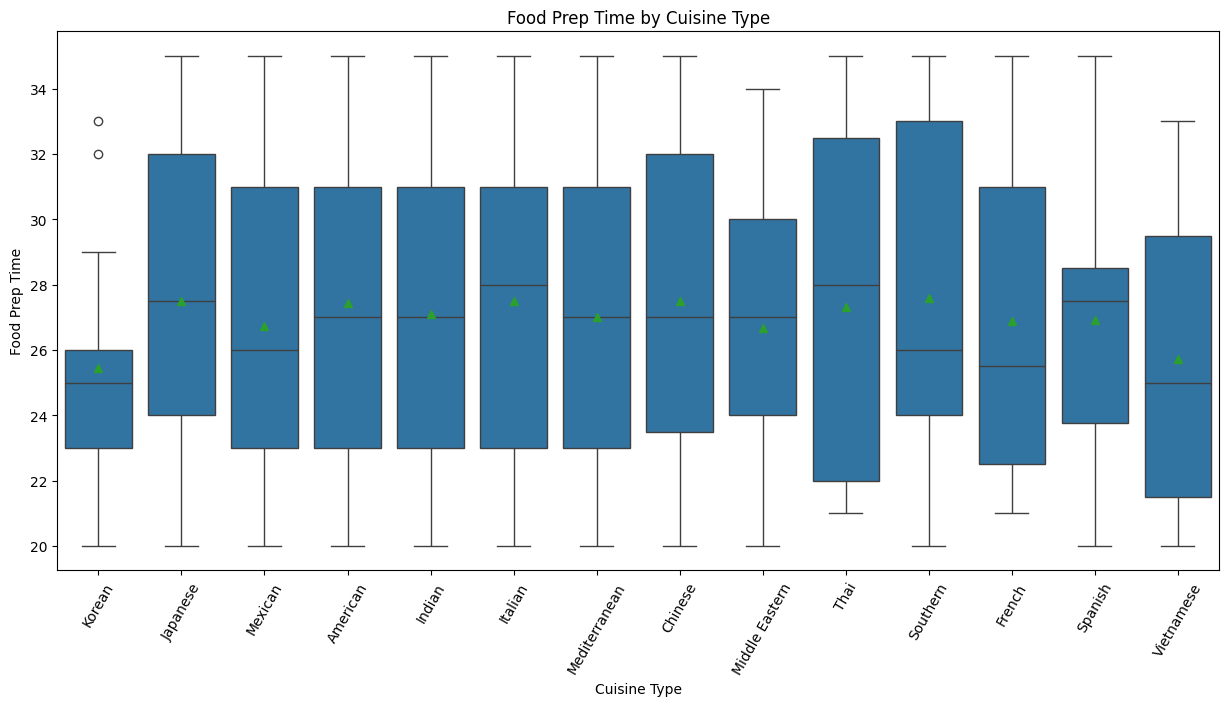

<ipython-input-37-b4c1e19b675d>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='viridis')


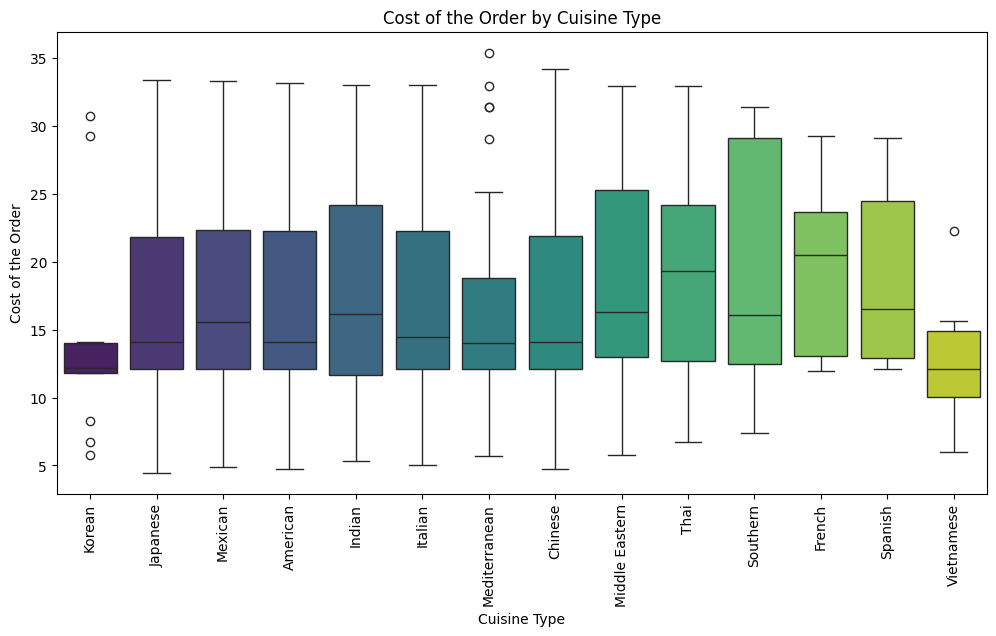

<ipython-input-37-b4c1e19b675d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='viridis')


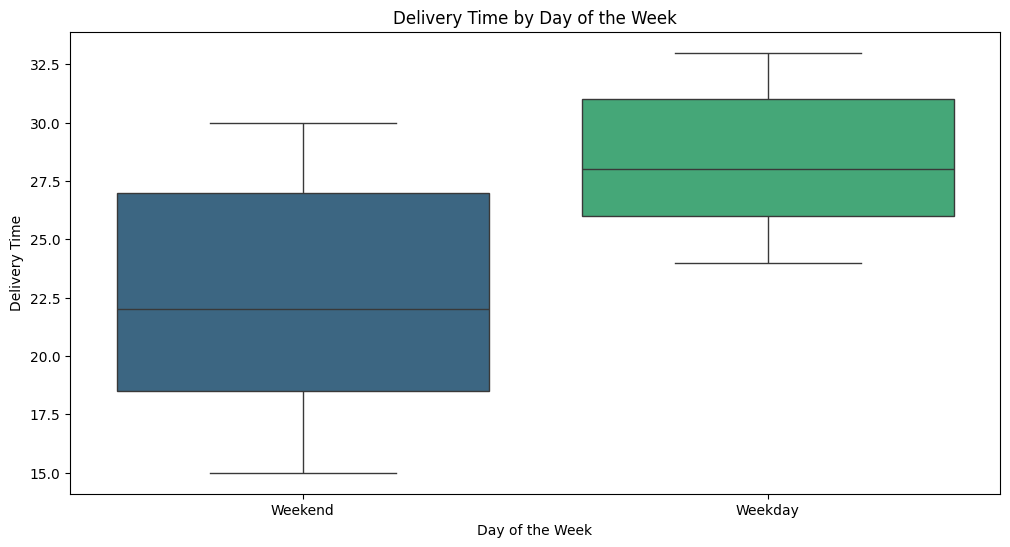

In [37]:
# Write the code here



# Pair plot to visualize relationships between numerical variables
sns.pairplot(df)
plt.title('Pair Plot of Numerical Variables')
plt.show()

# Group-by analysis: average cost of the order by cuisine type
avg_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
print("Average cost of the order by cuisine type:")
print(avg_cost_by_cuisine)

# Bar plot for average cost of the order by cuisine type
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_by_cuisine.index, y=avg_cost_by_cuisine.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.show()

## THis block of code shows the cuisine type by prep time ##
plt.figure(figsize=(15, 7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, showmeans=True)
plt.xticks(rotation=60)
plt.title('Food Prep Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Prep Time')
plt.show()


# Explore relationships between numerical and categorical variables using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.show()

# Analysis of delivery time by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='viridis')
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Write the code here

def eligible_restaurants_for_promotion(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Filter out rows with 'Not given' ratings
    df = df[df['rating'] != 'Not given']

    # Convert rating column to numeric
    df['rating'] = pd.to_numeric(df['rating'])

    # Group by restaurant name and calculate rating count and average rating
    restaurant_ratings = df.groupby('restaurant_name').agg(
        rating_count=('rating', 'size'),
        average_rating=('rating', 'mean')
    )

    # Filter for restaurants with rating count > 50 and average rating > 4
    eligible_restaurants = restaurant_ratings[
        (restaurant_ratings['rating_count'] > 50) &
        (restaurant_ratings['average_rating'] > 4)
    ]

    return eligible_restaurants


# Find and print the eligible restaurants
eligible_restaurants = eligible_restaurants_for_promotion(path)
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:
There are four restaraunts eligible for the promotional offer and those are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
# Write the code here

def calculate_net_revenue(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Initialize revenue column to zero
    df['revenue'] = 0

    # Calculate revenue based on conditions
    df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25
    df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15

    # Sum up the revenue to get the net revenue
    net_revenue = df['revenue'].sum()

    return net_revenue

# Calculate and print the net revenue
net_revenue = calculate_net_revenue(path)
print(f"Net revenue generated by the company across all orders: ${net_revenue:.2f}")



Net revenue generated by the company across all orders: $6166.30


#### Observations:
The Net revenue generated by the company across all orders: $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [40]:
# Write the code here

def percentage_orders_above_60_minutes(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Calculate total delivery time (food preparation time + delivery time)
    df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

    # Calculate the percentage of orders that take more than 60 minutes
    total_orders = len(df)
    orders_above_60_minutes = df[df['total_delivery_time'] > 60].shape[0]
    percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

    return percentage_above_60_minutes


# Calculate and print the percentage of orders taking more than 60 minutes
percentage_above_60_minutes = percentage_orders_above_60_minutes(path)
print(f"Percentage of orders taking more than 60 minutes to get delivered: {percentage_above_60_minutes:.2f}%")



Percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### Observations:
The percentage of orders taking more than 60 minutes to get delivered: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [41]:
# Write the code here

def analyze_delivery_time(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Calculate the mean delivery time for weekdays and weekends
    mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

    return mean_delivery_time


# Calculate and print the mean delivery time for weekdays and weekends
mean_delivery_time = analyze_delivery_time(path)
print("Mean delivery time during weekdays and weekends:")
print(mean_delivery_time)

Mean delivery time during weekdays and weekends:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are several conclusions that can be made from this analysis. I have outlined them below

* The relationship between many of the variables both categorical and numerical is illustrated throughout the analysis of the dataset. Topics such as day of the week and cuisine type are commonly highlighted as being intertwined. More specifically, there are certain days of the week that the delivery time is faster and also correlated with the type of cuisine.

* Additionally, certain restaraunts have higher ratings than others. For example, Shake Shack was in the top 5 restaurants in terms of the number of orders received.

* The most commonly ordered type of cuisine on the weekends is American

* Finally, roughly 30% of the order (29.24% to be exact) cost more than $20.

* Weekend days tend to have much greater number of Orders than weekday but they also have shorter delivery times.


### Recommendations:

*  A couple of high level recommendations:

* Given the analysis on this dataset, it would be pertinent for certain organizations to target their cuisine types to the certain days of the week that it is more desirable: IE American cuisine on the weekends.

* Additionally, I would recommend creating more promotional offers that target restaurants like Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop that are getting higher ratings in order to encourage other restaurants to push harder and receive higher reviews.

* I would also recommend creating a higher reward column for customers with the associated ID of the most frequent orders and this could incentivize them to continue shopping at the restaraunt and ordering food from there.

* My final recommendation is to motivate customers to give an order rating with potentially a coupon or something as a lot of the rating data had 'NOT GIVEN' as a rating, indicating that a customer did not participate in rating the restaraunt.

---

In [44]:
!jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode_Alec_Williams.ipynb

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode_Alec_Williams.ipynb to html
[NbConvertApp] Writing 2274840 bytes to PYF_Project_LearnerNotebook_FullCode_Alec_Williams.html
